# Data Wrangling

Data Organization
- File structure
- Git & Github

Data Collection
- Locating the data
- Loading the data
- Joining the data

Data Definition
- Column names
- Data types (numeric, categorical, timestamp, etc.)
- Description of the columns
- Count or percent per unique values or codes (including NA)
- The range of values or codes

Data Cleaning
- NA or Missing data
- Duplicates
- Text processing

In [2]:
!pip install stem

  Created wheel for stem: filename=stem-1.8.0-py3-none-any.whl size=436037 sha256=9aa5370427737fb6acaf4f5001220527e649e5b6fde8aabd920304e66dabc5c3
  Stored in directory: c:\users\piyus\appdata\local\pip\cache\wheels\a3\1b\fa\3c533b58f796531853a1be08235439bc11594221011f472ebf
Successfully built stem


In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import string
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import stem

#suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Show plots inline
%matplotlib inline

In [4]:
os.getcwd()

'C:\\Users\\piyus\\Desktop\\Guided Capstone-Springboard\\3Capstone 3-Tag Classification of Stackoverflow'

In [5]:
os.listdir()

['.ipynb_checkpoints',
 'Answers.csv.zip',
 'Capstone 3-files links.txt',
 'data',
 'Data Wrangling and Exploratory Data Analysis.ipynb',
 'notebooks-sample',
 'Pre-processing and Training Data Development and Modeling.ipynb',
 'Questions.csv.zip',
 'reports',
 'reports-sample',
 'Tags.csv.zip']

### Data Organization

In [6]:
filenames = ['.\data\Answers.csv','.\data\Questions.csv','.\data\Tags.csv']
dfs=[]

for f in filenames:
    dfs.append(pd.read_csv(f, encoding="ISO-8859-1"))

In [7]:
df_answers=dfs[0]
df_questions=dfs[1]
df_tags=dfs[2]

In [8]:
print(df_questions.head(2), df_answers.head(2), df_tags.head(2))

   Id  OwnerUserId          CreationDate            ClosedDate  Score  \
0  80         26.0  2008-08-01T13:57:07Z                   NaN     26   
1  90         58.0  2008-08-01T14:41:24Z  2012-12-26T03:45:49Z    144   

                                               Title  \
0  SQLStatement.execute() - multiple queries in o...   
1  Good branching and merging tutorials for Torto...   

                                                Body  
0  <p>I've written a database generation script i...  
1  <p>Are there any really good tutorials explain...       Id  OwnerUserId          CreationDate  ParentId  Score  \
0   92         61.0  2008-08-01T14:45:37Z        90     13   
1  124         26.0  2008-08-01T16:09:47Z        80     12   

                                                Body  
0  <p><a href="http://svnbook.red-bean.com/">Vers...  
1  <p>I wound up using this. It is a kind of a ha...      Id             Tag
0  80            flex
1  80  actionscript-3


In [9]:
print(df_questions.shape[0], df_answers.shape[0],df_tags.shape[0])

1264216 2014516 3750994


In [10]:
df_questions.Id.nunique()

1264216

In [11]:
df_answers.drop(columns=['Id','OwnerUserId', 'CreationDate'],inplace=True)
df_answers.columns=['Id', 'A_Score', 'A_Body']

Merge "questions" and "answers" dataframes using LEFT JOIN to get all answers mapped to a given question

In [12]:
df= pd.merge(df_answers,df_questions,how='left', on='Id')

In [13]:
print(df.Id.nunique(), df.shape[0])

1102568 2014516


Merge "tags" associated to a given "Id" to output "tags by unique Id"

In [14]:
df_tags['Tag']=df_tags['Tag'].astype(str)
df_tags = df_tags.groupby('Id')['Tag'].apply(', '.join).reset_index()

In [15]:
df_tags.shape[0]

1264216

Merge "Questions & Answers" merged dataframe at prior step and updated "Tag" dataframe from prior step using INNER JOIN to get all "answers" mapped to a given "question" and associated "tags"

In [16]:
df_merged= pd.merge(df,df_tags,how='inner',on='Id')
df_merged.head()

,Id,A_Score,A_Body,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,Tag
0,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers...",58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,"svn, tortoisesvn, branch, branching-and-merging"
1,90,2,"<p>You can also try <em><a href=""http://www.co...",58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,"svn, tortoisesvn, branch, branching-and-merging"
2,90,19,<p>My easy click-by-click instructions (<stron...,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,"svn, tortoisesvn, branch, branching-and-merging"
3,80,12,<p>I wound up using this. It is a kind of a ha...,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,"flex, actionscript-3, air"
4,80,6,"<p>The <a href=""http://en.wikipedia.org/wiki/S...",26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,"flex, actionscript-3, air"


In [17]:
df_merged.shape[0]

2014516

In [18]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2014516 entries, 0 to 2014515
Data columns (total 10 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Id            int64  
 1   A_Score       int64  
 2   A_Body        object 
 3   OwnerUserId   float64
 4   CreationDate  object 
 5   ClosedDate    object 
 6   Score         int64  
 7   Title         object 
 8   Body          object 
 9   Tag           object 
dtypes: float64(1), int64(3), object(6)
memory usage: 169.1+ MB


In [19]:
df_merged.Tag.value_counts()

java                                                                15959
javascript, jquery                                                  14906
php                                                                 14138
android                                                             14108
javascript                                                          13387
                                                                    ...  
javascript, 3d, three.js, webgl, antialiasing                           1
android, android-edittext, charsequence                                 1
python, numpy, scipy, nonlinear-optimization                            1
c#, json, excel, linq, visual-studio                                    1
oracle11g, database-connection, java-7, connection-pooling, jooq        1
Name: Tag, Length: 594790, dtype: int64

In [20]:
(df_merged.Tag.nunique()/df_merged.Tag.size)*100

29.525206054456753

__Range of values per column__

Minimum and Maximum values for numeric datatype columns

In [21]:
df_merged.agg([min,max]).T

,min,max
Id,80,40143190
A_Score,-42,5718
A_Body,\n\n \n \n\n \nHigh perfo...,you can try toolbar\n\n<pre><code>android.supp...
OwnerUserId,1.0,7046594.0
CreationDate,2008-08-01T13:57:07Z,2016-10-19T23:36:01Z
Score,-73,5190
Title,java.lang.NoClassDefFoundError: javax/serv...,ãSIPãIs sip api in android 2.3 support the...
Body,\n\n<h1>Background</h1>\n\n<p>I have a library...,When user write http://nextech.pk/ in the brow...
Tag,.htaccess,"zxing, zbar"


In [22]:
df_merged._get_numeric_data().describe()

,Id,A_Score,OwnerUserId,Score
count,2.014516e+06,2.014516e+06,1.982623e+06,2.014516e+06
mean,1.808390e+07,2.480563e+00,1.815046e+06,5.675192e+00
std,1.169152e+07,1.590938e+01,1.700506e+06,4.671622e+01
min,8.000000e+01,-4.200000e+01,1.000000e+00,-7.300000e+01
25%,7.692900e+06,0.000000e+00,4.400300e+05,0.000000e+00
50%,1.712404e+07,1.000000e+00,1.236022e+06,1.000000e+00
75%,2.804977e+07,2.000000e+00,2.787211e+06,3.000000e+00
max,4.014319e+07,5.718000e+03,7.046594e+06,5.190000e+03


Number and Proportion of null values across all columns

In [23]:
df_merged.isnull().sum().sort_values(ascending = False)

ClosedDate      1915448
OwnerUserId       31893
Id                    0
A_Score               0
A_Body                0
CreationDate          0
Score                 0
Title                 0
Body                  0
Tag                   0
dtype: int64

In [24]:
nas=pd.DataFrame(df_merged.isnull().sum().sort_values(ascending=False)/len(df_merged),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent
ClosedDate,0.950823
OwnerUserId,0.015832


### Data Cleaning

In [25]:
# Drop duplicates, if any
df_merged=df_merged.drop_duplicates()

In [26]:
df_merged.shape[0]

2014512

In [27]:
df_merged.isnull().sum().sort_values(ascending = False)

ClosedDate      1915444
OwnerUserId       31893
Id                    0
A_Score               0
A_Body                0
CreationDate          0
Score                 0
Title                 0
Body                  0
Tag                   0
dtype: int64

In [28]:
# Delete irrelevant variables(features)
df_merged.drop(columns=['OwnerUserId', 'ClosedDate'],inplace=True)

In [29]:
df_merged.dtypes

Id               int64
A_Score          int64
A_Body          object
CreationDate    object
Score            int64
Title           object
Body            object
Tag             object
dtype: object

In [30]:
# Datatype converstion
df_merged['CreationDate'] =  pd.to_datetime(df_merged['CreationDate'])
#df_merged['CreationDate'] = df['CreationDate'].apply(lambda x: dt.datetime.strptime(x,"%Y-%m-%dT%H:%M:%S.%fZ"))
#df_merged.CreationDate =  pd.to_datetime(df_merged['CreationDate']).dt.year
df_merged.columns

Index(['Id', 'A_Score', 'A_Body', 'CreationDate', 'Score', 'Title', 'Body',
       'Tag'],
      dtype='object')

In [31]:
df_merged.dtypes

Id                            int64
A_Score                       int64
A_Body                       object
CreationDate    datetime64[ns, UTC]
Score                         int64
Title                        object
Body                         object
Tag                          object
dtype: object

Rename Question 'Score' and 'Body' column names

In [32]:
df_merged.rename(columns={'Body':'Q_Body','Score':'Q_Score', 'CreationDate':'CreationYear'}, inplace=True)
print(df_merged.shape[0], df_merged.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2014512 entries, 0 to 2014515
Data columns (total 8 columns):
 #   Column        Dtype              
---  ------        -----              
 0   Id            int64              
 1   A_Score       int64              
 2   A_Body        object             
 3   CreationYear  datetime64[ns, UTC]
 4   Q_Score       int64              
 5   Title         object             
 6   Q_Body        object             
 7   Tag           object             
dtypes: datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 138.3+ MB
2014512 None


In [33]:
columnsTitles = ['Id', 'CreationYear','Title', 'Q_Body', 'Tag', 'Q_Score', 'A_Body', 'A_Score']
df_merged = df_merged.reindex(columns=columnsTitles)

In [34]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2014512 entries, 0 to 2014515
Data columns (total 8 columns):
 #   Column        Dtype              
---  ------        -----              
 0   Id            int64              
 1   CreationYear  datetime64[ns, UTC]
 2   Title         object             
 3   Q_Body        object             
 4   Tag           object             
 5   Q_Score       int64              
 6   A_Body        object             
 7   A_Score       int64              
dtypes: datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 138.3+ MB


In [35]:
df_merged.shape[0]

2014512

In [36]:
df_merged.isnull().sum()

Id              0
CreationYear    0
Title           0
Q_Body          0
Tag             0
Q_Score         0
A_Body          0
A_Score         0
dtype: int64

Text preprocessing before performing missing value handling further:

- Convert all letters to lower or upper case
- Remove punctuations (in this case, only html tags i.e. markdowns that are presented for each question when a developer posts questions)
- Remove stop words, sparse terms, and particular words
- Remove whitespaces (remove leading and ending spaces)
- Stemming using NLTK library
- Remove records whose question title < 10 characters

In [40]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
stop_words = stopwords.words('english')

stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\piyus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\piyus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [41]:
def remove_punctuation(s):
    s = ''.join([i for i in s if i not in frozenset(string.punctuation)])
    return s

In [42]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub(r"\'\n", " ", text)
    text = re.sub(r"\'\xa0", " ", text)
    text = re.sub('\s+', ' ', text)
    return text

In [43]:
df_merged['Title'] = df_merged['Title'].str.lower()
df_merged['Title'] = df_merged['Title'].apply(remove_punctuation)
df_merged['Title'] = df_merged['Title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df_merged['Title'] = df_merged['Title'].apply(lambda x: stemmer.stem(x))
df_merged['Title'] = df_merged['Title'].apply(lambda x: clean_text(x))

In [44]:
df_merged = df_merged[df_merged['Title'].str.len() >= 15]

In [45]:
df_merged['Title'].sample(10)

719130                   zend controller cant specify layout
1634373                      php filter specific pattern str
251752     writing data one file several instances single...
335979                                       circular depend
1024678              fonts heroku using wickedpdfwkhtmltopdf
1215767                                      list google map
283216               open multiple windows verify php condit
755070                      remove specific line json jqueri
1192079                      get strpos distinguish 1 10 str
367445                         whos online using devise rail
Name: Title, dtype: object

In [46]:
df_merged.shape[0]

1980409

## Exploratory Data Analysis

__Identify any anomalies and outliers__
- Create boxplot
- Create histogram of 'numeric' variables

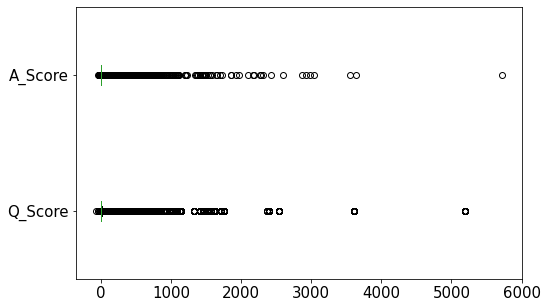

In [47]:
f, ax = plt.subplots(figsize=(8, 5))

df_num = df_merged.select_dtypes(include=np.number)
df_num = df_num.drop(['Id'], axis =1)
df_num.head(2)
boxplot = df_num.boxplot(grid=False, vert=False,fontsize=15)

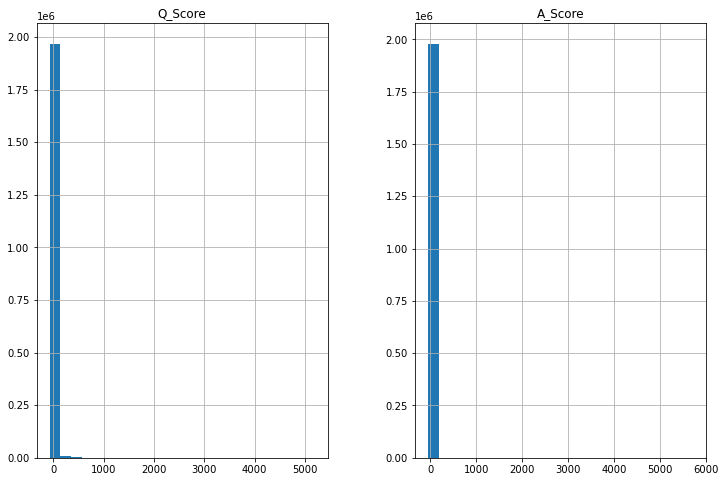

In [48]:
df_num.hist(bins = 25, figsize = (12,8));

In [49]:
df_num[['Q_Score','A_Score']].describe()

,Q_Score,A_Score
count,1.980409e+06,1.980409e+06
mean,5.627585e+00,2.465003e+00
std,4.675182e+01,1.586115e+01
min,-7.300000e+01,-4.200000e+01
25%,0.000000e+00,0.000000e+00
50%,1.000000e+00,1.000000e+00
75%,3.000000e+00,2.000000e+00
max,5.190000e+03,5.718000e+03


Remove outliers from Answer and Question scores to normalise plot

In [50]:
#https://stackoverflow.com/questions/50461349/how-to-remove-outlier-from-dataframe-using-iqr

stepframe = df_merged[['Q_Score','A_Score']] 

Q1 = stepframe.quantile(0.25)
Q3 = stepframe.quantile(0.75)
IQR = Q3 - Q1

df = stepframe[~((stepframe < (Q1 - 1.5 * IQR)) |(stepframe > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape[0]

1701432

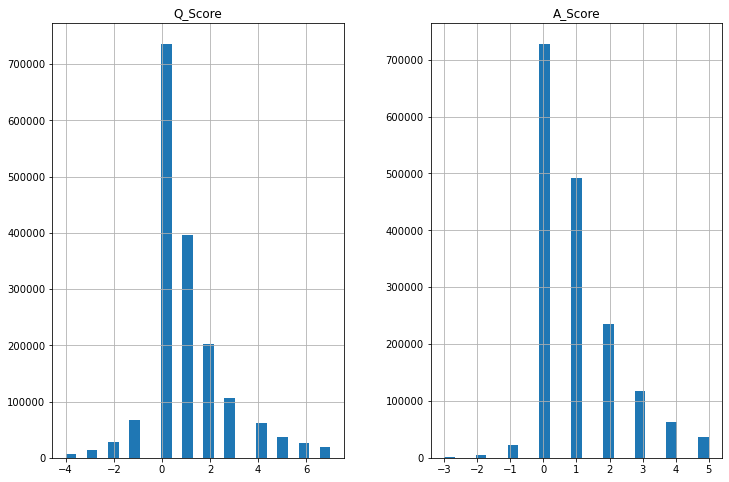

In [51]:
df_iqr = df
df_iqr.hist(bins = 25, figsize = (12,8));

In [52]:
#df_no_outliers= pd.merge(df_merged,df_iqr,how='right',on=['Q_Score','A_Score'])
df_no_outliers = pd.concat([df_iqr,df_merged],axis = 1, join = 'inner')
df_no_outliers.shape[0]

1701432

In [53]:
df_no_outliers.columns

Index(['Q_Score', 'A_Score', 'Id', 'CreationYear', 'Title', 'Q_Body', 'Tag',
       'Q_Score', 'A_Body', 'A_Score'],
      dtype='object')

In [54]:
df_no_outliers = df_no_outliers.loc[:,~df_no_outliers.columns.duplicated()]
df_no_outliers.columns

Index(['Q_Score', 'A_Score', 'Id', 'CreationYear', 'Title', 'Q_Body', 'Tag',
       'A_Body'],
      dtype='object')

For sake of avoiding EDA on duplicated question fields like 'Title', 'Tags', 'Q_Body', create a new dataframe whenever EDA needs to be performed on those fields

In [55]:
df_no_outliers_unique_q = df_no_outliers.drop_duplicates(subset = ['Id'],keep=False)
print(df_no_outliers_unique_q.columns, df_no_outliers_unique_q.shape[0])

Index(['Q_Score', 'A_Score', 'Id', 'CreationYear', 'Title', 'Q_Body', 'Tag',
       'A_Body'],
      dtype='object') 589261


In [56]:
df_no_outliers_unique_q.shape[0]

589261

Bar chart of most popular tags - "single" OR "combination" (in descending order)

In [57]:
# Center output (plots) in the notebook
# https://moonbooks.org/Articles/How-to-center-a-matplotlib-figure-in-a-Jupyter-notebook-/

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

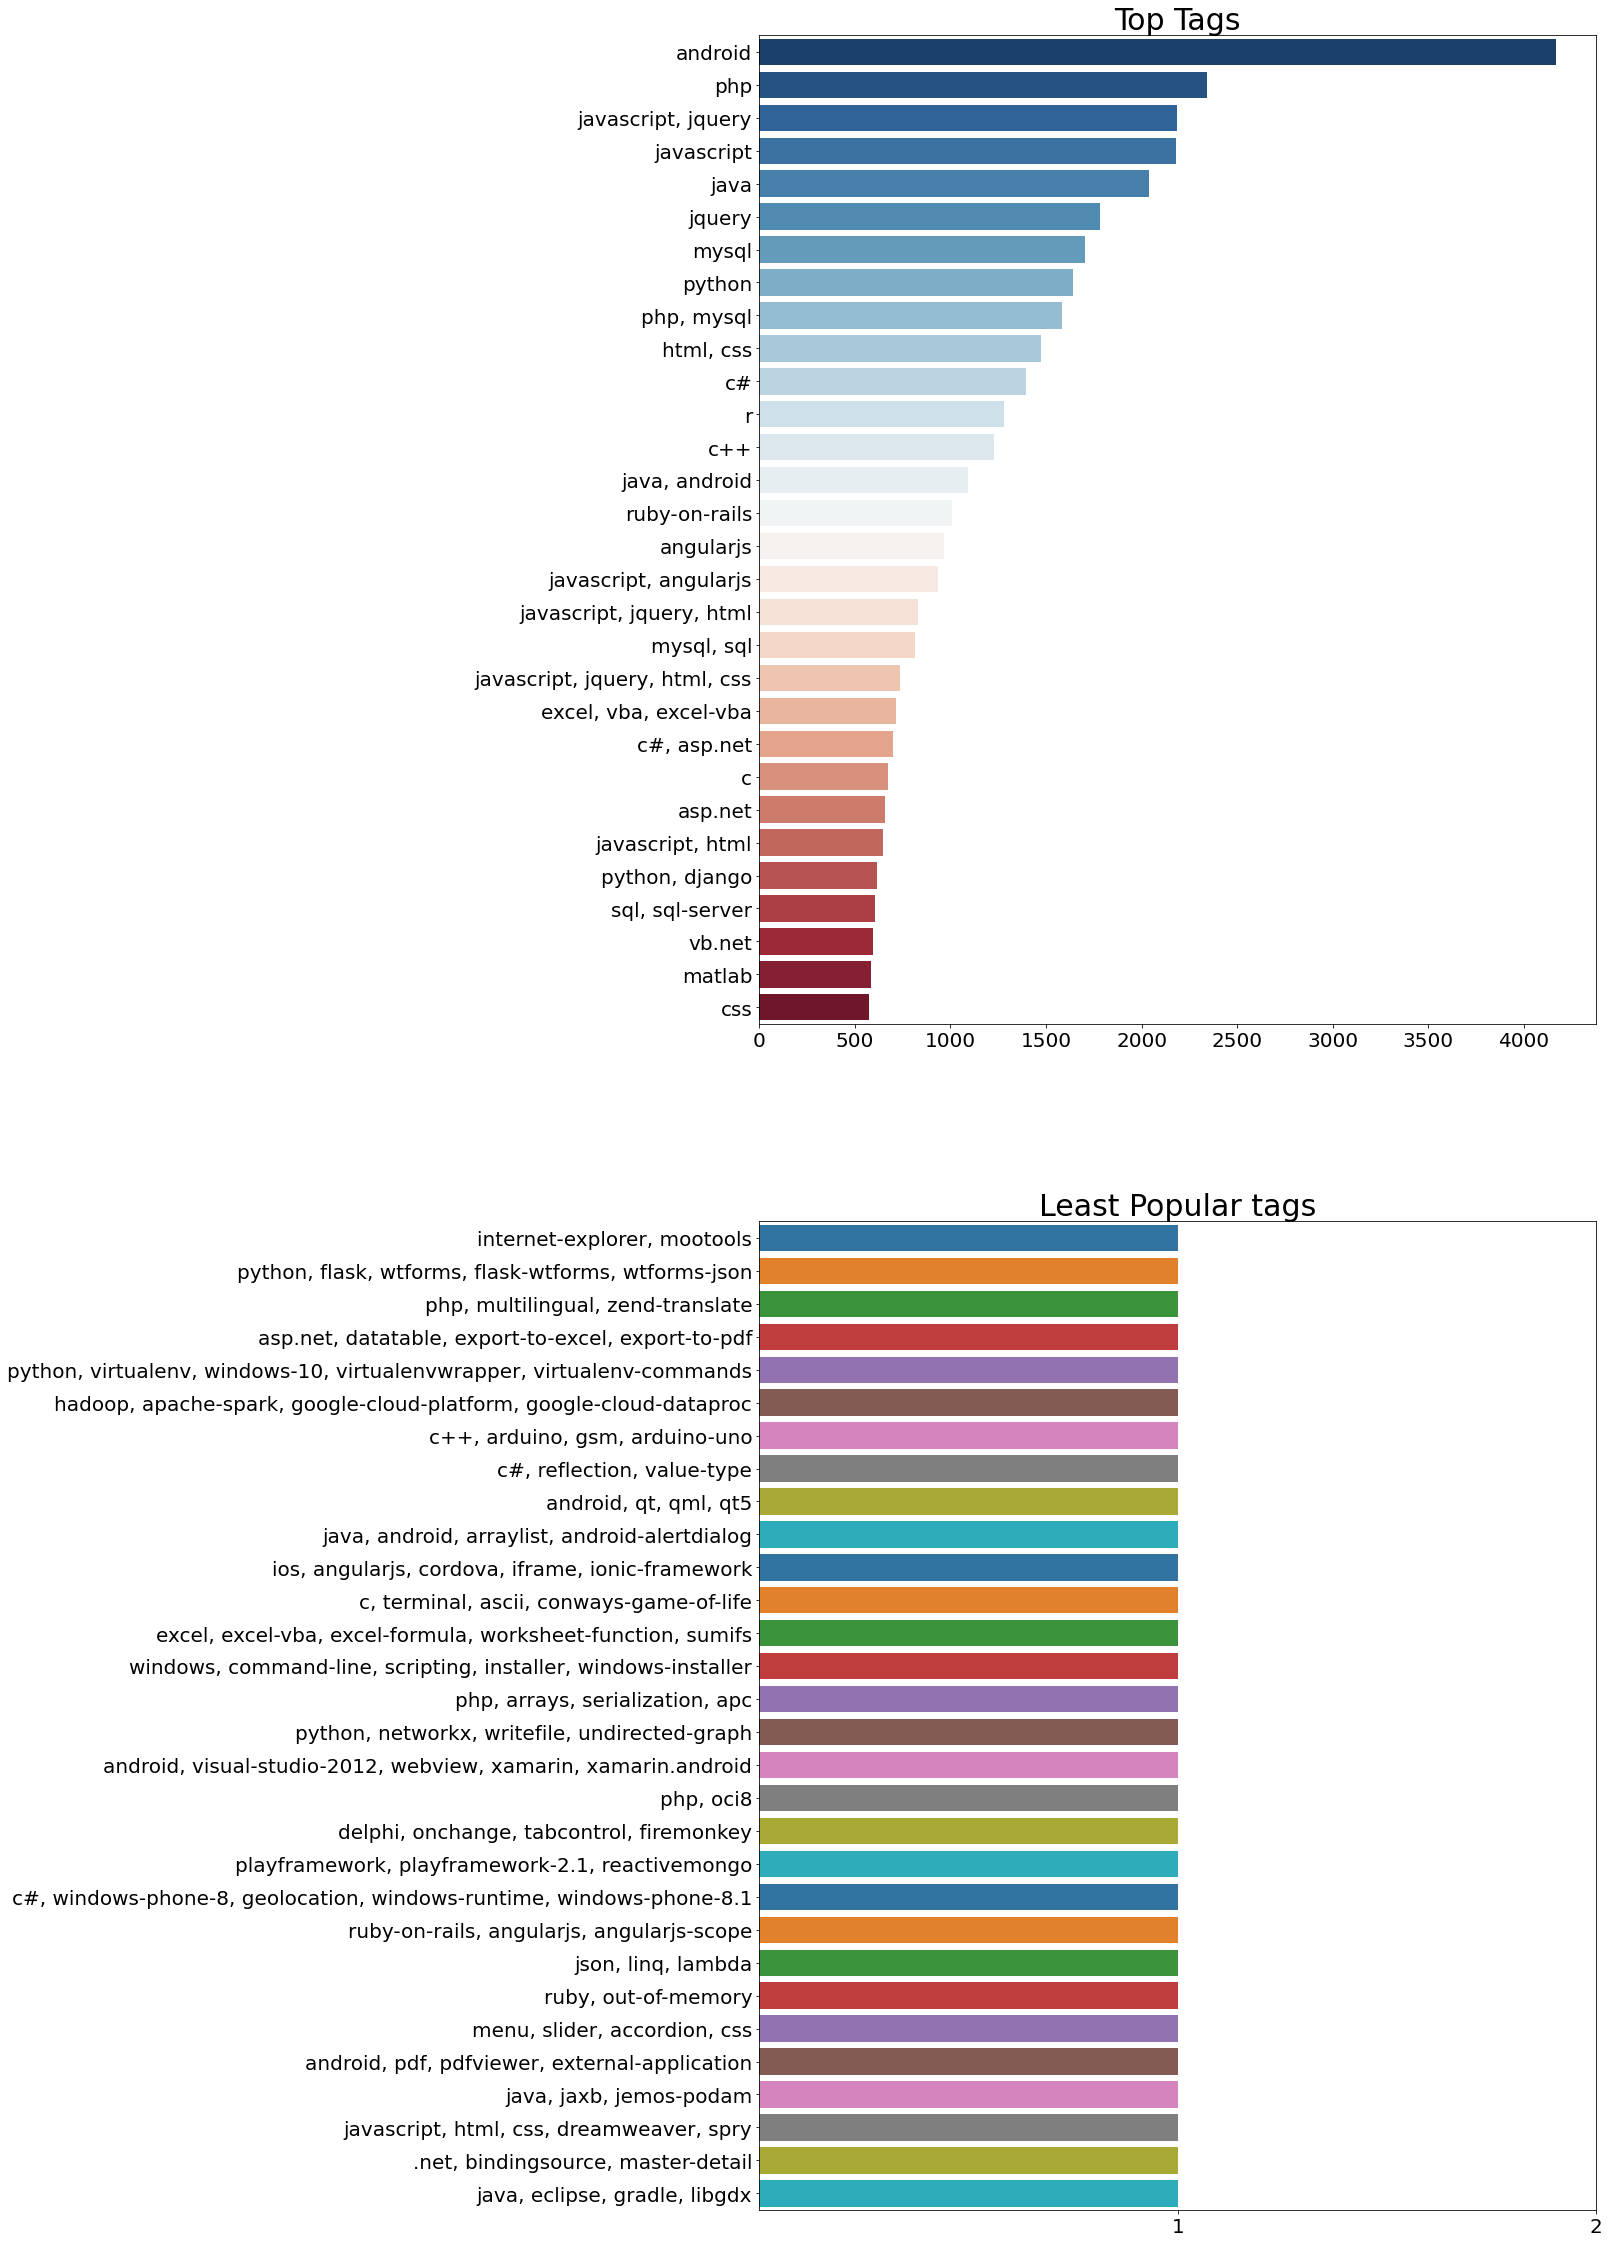

In [59]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (15,40))

# Find the value_counts() of the 'Tags' 
x = pd.DataFrame(df_no_outliers_unique_q.Tag.value_counts())
y = pd.DataFrame(df_no_outliers_unique_q.Tag.value_counts(ascending=True))


# Get tag names by calling list() on the x.index
names_desc = list(x[:30].index)
names_asc = list(y[:30].index)

# Get values by plugging x.Tag into the list() function
values_desc = list(x[:30].Tag)
values_asc = list(y[:30].Tag)


sns.barplot(x=values_desc, y=names_desc, palette="RdBu_r", ax=ax[0])
ax[0].set_title("Top Tags",fontsize=30)
ax[0].tick_params(labelsize=20)

sns.barplot(x=values_asc, y=names_asc, palette="tab10", ax=ax[1])
ax[1].set_title("Least Popular tags",fontsize=30)
ax[1].set_xticks([1,2])
#ax[1].set_yticklabels(wrap=True)
#ax[1].set_ylabel("Tags",fontsize=20)
ax[1].tick_params(labelsize=20)

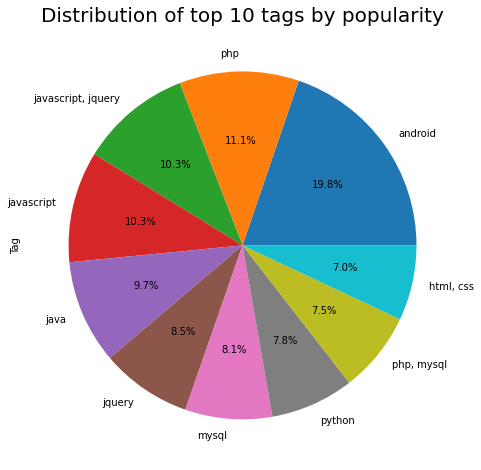

In [60]:
df_no_outliers_unique_q['Tag'].value_counts().head(10).plot(kind='pie',figsize=(8,8), autopct='%1.1f%%');
plt.title("Distribution of top 10 tags by popularity",fontsize=20)
plt.show()

__Conclusion - Android is at No. 1 in terms of developer community support, based on questions posted__

Explore Data Relationships

Text(0.5, 1.0, 'Heat Map of variables')

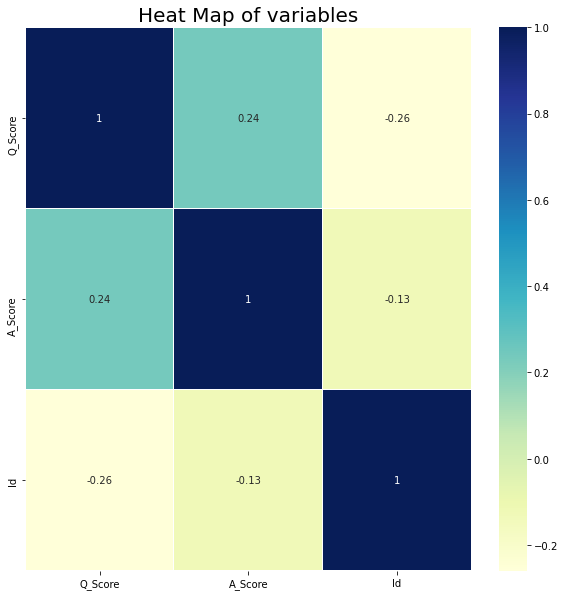

In [61]:
#Calculate correlation coefficients between numeric columns
corr = df_no_outliers.reset_index(drop=True).corr().round(2)
plt.figure(figsize=(10,10))

sns.heatmap(corr,linewidths=.1,cmap="YlGnBu", annot=True)
plt.title("Heat Map of variables",fontsize=20)

__Conclusion - No strong correlation between question & answer scores__

Q&A - Upvotes vs Downvotes

In [62]:
len(df_no_outliers['A_Score'])

1701432

In [63]:
len(df_no_outliers_unique_q['Q_Score'])

589261

In [64]:
df_no_outliers_unique_q['Q_Score'].value_counts()

 0    305714
 1    136977
 2     55610
-1     24886
 3     24444
 4     12110
-2      9716
 5      6454
-3      4283
 6      4055
 7      2720
-4      2292
Name: Q_Score, dtype: int64

In [65]:
Q_downvotes = len(df_no_outliers_unique_q[df_no_outliers_unique_q['Q_Score'] < 0])
Q_upvotes = len(df_no_outliers_unique_q[df_no_outliers_unique_q['Q_Score'] > 0])
A_downvotes = len(df_no_outliers[df_no_outliers['A_Score'] < 0])
A_upvotes = len(df_no_outliers[df_no_outliers['A_Score'] > 0])


print("Downvotes and Upvotes for questions are: {} and {}".format(Q_downvotes, Q_upvotes))
print("Downvotes and Upvotes for answers are: {} and {}".format(A_downvotes, A_upvotes))

Downvotes and Upvotes for questions are: 41177 and 242370
Downvotes and Upvotes for answers are: 28367 and 944780


Text(0.5, 1.0, 'Question vs Answers')

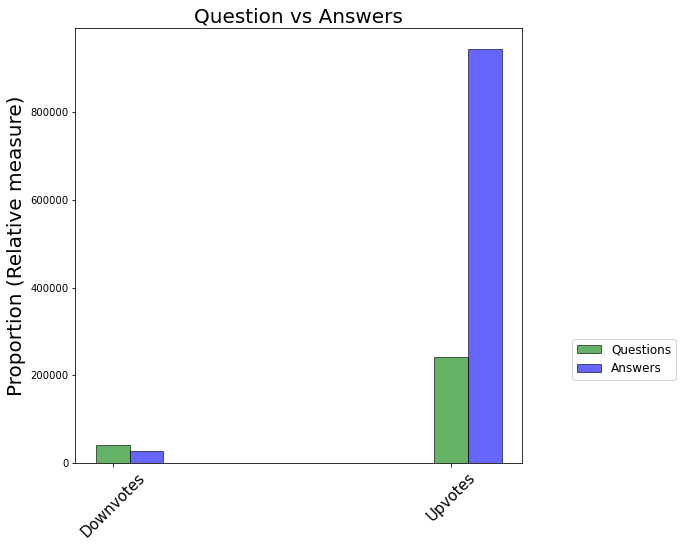

In [66]:
# fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,12))
plt.figure(figsize=(8,8))
index_questions=[1, 2]
index_answers=[1.1, 2.1]

answer_votes = [A_downvotes, A_upvotes]
question_votes = [Q_downvotes, Q_upvotes]

plt.xticks([1,2], ["Downvotes", "Upvotes"], rotation=45, fontsize=15)
_=plt.bar(index_questions, question_votes, label = 'Questions',color='green',alpha=0.6, edgecolor='k',width=0.1)
_=plt.bar(index_answers, answer_votes, label = 'Answers',color='blue',alpha=0.6, edgecolor='k',width=0.1)
_= plt.ylabel('Proportion (Relative measure)',fontsize=20)
plt.legend(loc=0,bbox_to_anchor=(1.1,0.3), fontsize = 'large')
plt.title('Question vs Answers',fontsize=20)

__Conclusion - High %-age of downvotes to questions than to answers__

Q&A Scores by 'CreationYear'(when question was posted)

In [67]:
df_no_outliers['CreationYear'] = pd.DatetimeIndex(df_no_outliers['CreationYear']).year

In [68]:
df_no_outliers['CreationYear'].value_counts()

2013    289844
2014    283389
2015    275448
2012    245624
2016    215249
2011    191641
2010    119310
2009     68982
2008     11945
Name: CreationYear, dtype: int64

In [69]:
np.random.seed(2018)

df_no_outliers.reset_index(drop=True, inplace=True)
sample = np.random.choice(df_no_outliers.shape[0], 10000, replace = False) 
df_subset = df_no_outliers.loc[sample]

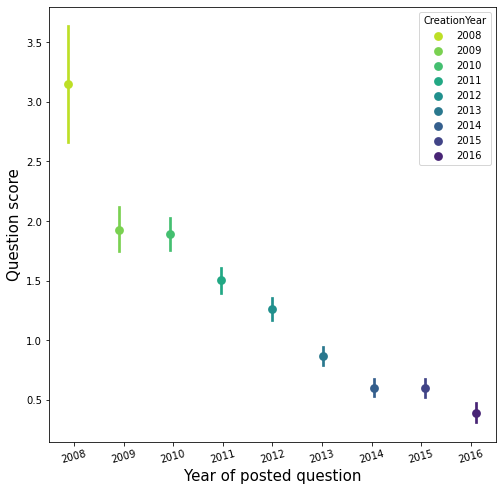

In [70]:
plt.figure(figsize=(8,8))

ax = sns.pointplot(data = df_subset, x = 'CreationYear', y= 'Q_Score', hue = 'CreationYear', dodge = True, linestyles = "", palette = 'viridis_r')
plt.xticks(rotation = 15);
plt.ylabel('Question score',fontsize=15);
plt.xlabel('Year of posted question',fontsize=15);
plt.show();

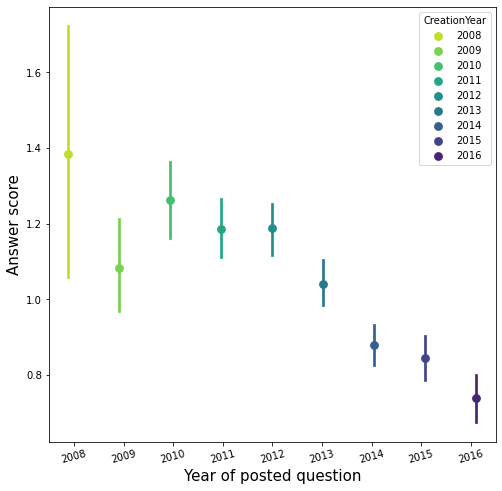

In [71]:
plt.figure(figsize=(8,8))

ax = sns.pointplot(data = df_subset, x = 'CreationYear', y= 'A_Score', hue = 'CreationYear', dodge = True, linestyles = "", palette = 'viridis_r')
plt.xticks(rotation = 15);
plt.ylabel('Answer score',fontsize=15);
plt.xlabel('Year of posted question',fontsize=15);
plt.show();

__Conclusion__- Average scores for both question and answers have reduced over time. Could be possibly due to a different scoring mechanism which could have possibly changed later OR the initial enthusiasm of yestereyears where developer community used to more actively upvote on questions and answers which eventually started reducing over time

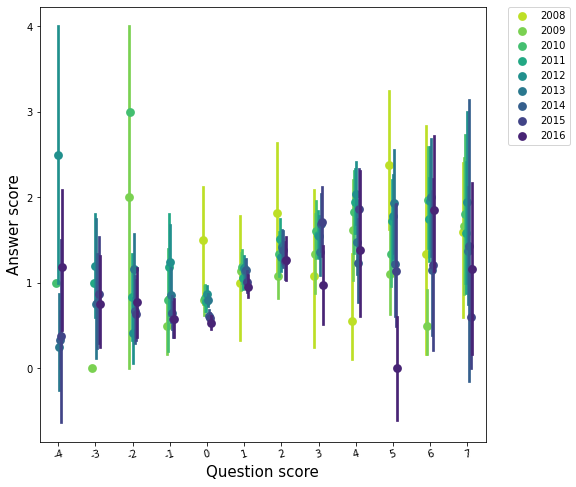

In [72]:
plt.figure(figsize=(8,8))

ax = sns.pointplot(data = df_subset, x = 'Q_Score', y= 'A_Score', hue = 'CreationYear', dodge = True, linestyles = "", palette = 'viridis_r')
plt.xticks(rotation = 15);
plt.ylabel('Answer score',fontsize=15);
plt.xlabel('Question score',fontsize=15);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show();

Most popular Question Title - answered most number of times

In [73]:
top_20_question_count = df_no_outliers['Title'].value_counts().head(20)
top_20_question_df = pd.DataFrame(data=top_20_question_count).reset_index()
top_20_question_df.columns = ['Question', 'Count']
top_20_question_df

,Question,Count
0,regular express,35
1,operator overloading c,30
2,input string correct format,27
3,new coding languag,23
4,highest salary depart,23
5,interview questions challenging beginn,23
6,jquery selector problem,21
7,javascript valid,21
8,regular expression match,19
9,parse xml using java,19


['regular express', 'operator overloading c', 'input string correct format', 'new coding languag', 'highest salary depart', 'interview questions challenging beginn', 'jquery selector problem', 'javascript valid', 'regular expression match', 'parse xml using java', 'expect javascript become widely used outside brows', 'best framework webdevelopment start', 'jquery selector', 'boss tells make passwords usernames default softwar', 'need help sql queri', 'good diagramming software uml webdesign', 'convert string datetime format', 'whats reason table layout code considered bad', 'would improve algorithm c string revers', 'linux distribution fits new learner linux program'] [35, 30, 27, 23, 23, 23, 21, 21, 19, 19, 19, 18, 17, 17, 17, 17, 17, 17, 17, 17]


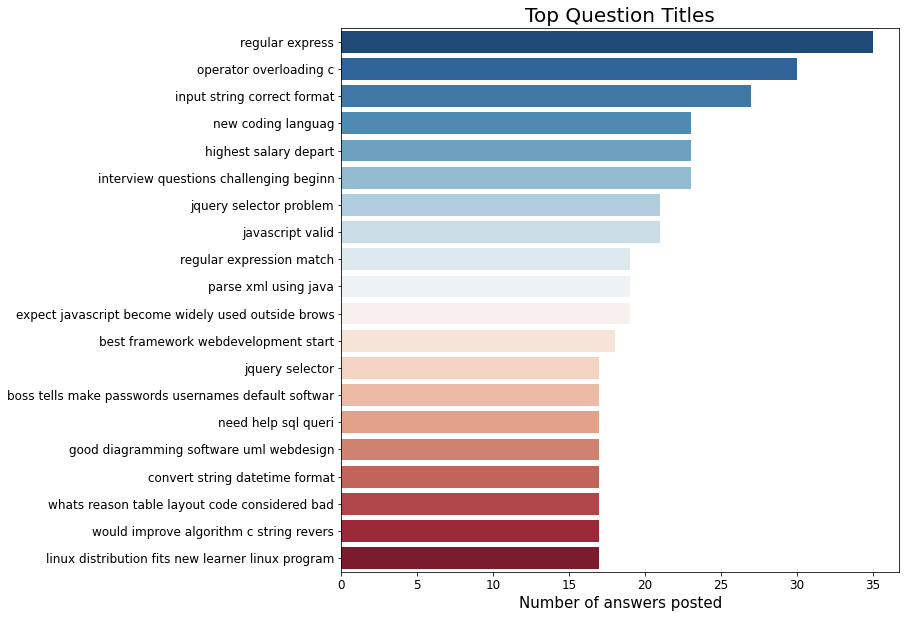

In [74]:
from textwrap import wrap
f, ax = plt.subplots(figsize=(10, 10))

names_top20 = list(top_20_question_df.Question)
values_top20 = list(top_20_question_df.Count)
print(names_top20, values_top20)

ax = sns.barplot(x=values_top20, y=names_top20, palette="RdBu_r", ax=ax)
ax.set_title("Top Question Titles",fontsize=20)
ax.set_xticks([0,5,10,15,20,25,30,35])
ax.set_xlabel('Number of answers posted', fontsize=15)
ax.tick_params(labelsize=12)

Most popular Questions - based on maximum upvotes

In [75]:
top_20_upvoted_questions = df_no_outliers_unique_q[df_no_outliers_unique_q['Q_Score'] > 0].sort_values(by=['Q_Score'], ascending=False).head(20)
top_20_upvoted_question_df = pd.DataFrame(data=top_20_upvoted_questions).drop(columns = ['A_Score','Id','CreationYear',
                                                                                         'Q_Body','Tag','A_Body']).reset_index()
top_20_upvoted_question_df[['Title','Q_Score']]

,Title,Q_Score
0,bash ruby command found,7
1,use phpjquery ajax check mysql database change...,7
2,parsing numbers safely localesensit,7
3,display animated gif windows phone 81 rt appl,7
4,semantic html use nav tag tag cloud,7
5,application app store search,7
6,cannot include files winsock2 windowsh,7
7,helping ghc unbox int equality const,7
8,html5 video seeking upd,7
9,jsonencode jsondecode methods mvc 6,7


['bash ruby command found', 'use phpjquery ajax check mysql database changes load chang', 'parsing numbers safely localesensit', 'display animated gif windows phone 81 rt appl', 'semantic html use nav tag tag cloud', 'application app store search', 'cannot include files winsock2 windowsh', 'helping ghc unbox int equality const', 'html5 video seeking upd', 'jsonencode jsondecode methods mvc 6', 'android dragging marker without hold map api v2', 'pagertabstrip position within viewpag', 'create cgpathref array point', 'better use hbase columns serialize data using avro', 'mount engine subdomain rails 31', 'convert kilometers radian', 'silverlight wcf ssl security error crossdomainxml never request', 'refactor large modelspy file django app', 'force 3rd party assembly use another version another assembl', 'difference honor verified audit staff openedx'] [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]


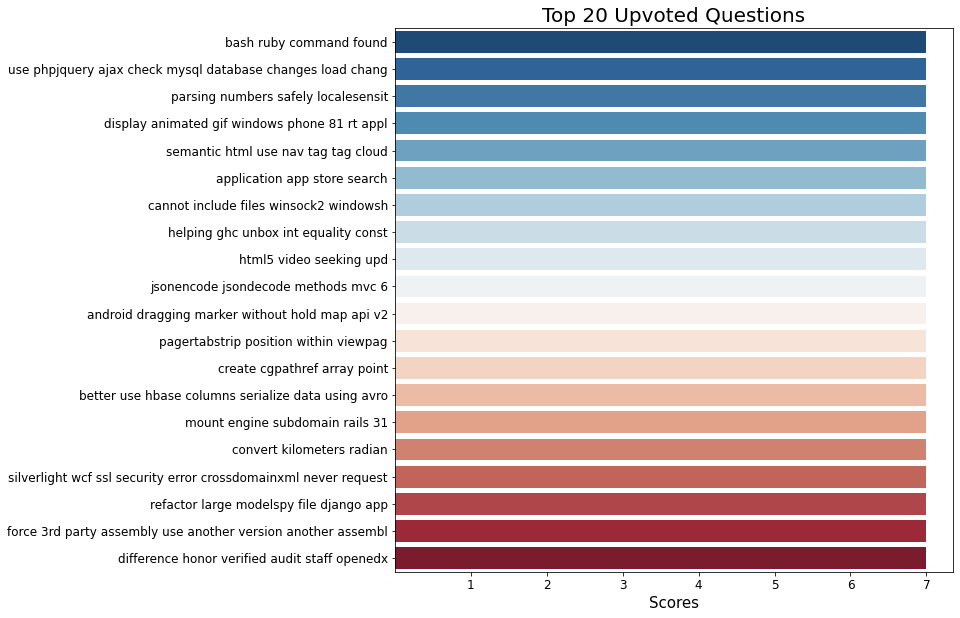

In [76]:
from textwrap import wrap
f, ax = plt.subplots(figsize=(10, 10))

names_top20_q_upvotes = list(top_20_upvoted_question_df.Title)
values_top20_q_upvotes = list(top_20_upvoted_question_df.Q_Score)
print(names_top20_q_upvotes, values_top20_q_upvotes)

ax = sns.barplot(x=values_top20_q_upvotes, y=names_top20_q_upvotes, palette="RdBu_r", ax=ax)
ax.set_title("Top 20 Upvoted Questions",fontsize=20)
ax.set_xticks([1,2,3,4,5,6,7])
ax.set_xlabel('Scores', fontsize=15)
ax.tick_params(labelsize=12)

Some text processing needs to be performed on the answers before plotting the chart

In [77]:
df_no_outliers['A_Body'] = df_no_outliers['A_Body'].apply(lambda x: re.sub('<[^<]+?>','',x))
df_no_outliers['A_Body'].head()

0    Validation should be captured separately from ...
1    From the perspective of having the most mainta...
2    It depends.\r\n\r\nGenerally, code should fail...
3    You might wanna check out Domain Driven Design...
4    I like to implement IDataErrorInfo and put my ...
Name: A_Body, dtype: object

In [79]:
df_no_outliers['A_Body'] = df_no_outliers['A_Body'].str.lower()
df_no_outliers['A_Body'] = df_no_outliers['A_Body'].apply(remove_punctuation)
#df_no_outliers['A_Body'] = df_no_outliers['A_Body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
#df_no_outliers['A_Body'] = df_no_outliers['A_Body'].apply(lambda x: stemmer.stem(x))
df_no_outliers['A_Body'] = df_no_outliers['A_Body'].apply(lambda x: clean_text(x))

In [80]:
top_20_upvoted_answers = df_no_outliers[df_no_outliers['A_Score'] > 0].sort_values(by=['A_Score'], ascending=False).head(20)
top_20_upvoted_answers_df = pd.DataFrame(data=top_20_upvoted_answers).drop(columns = ['Q_Score','Id','Title','CreationYear',
                                                                                         'Q_Body','Tag']).reset_index()
top_20_upvoted_answers_df[['A_Body','A_Score']]

,A_Body,A_Score
0,ltscript typetextjavascriptgt readyfunction va...,5
1,what do you mean by indent what i understand y...,5
2,int month day public void printnumeric systemo...,5
3,i dont have a quick way of testing this but ac...,5
4,def eqself other returns true if both instance...,5
5,as the lua manual states only objects that hav...,5
6,try create table mains id integer primary key ...,5
7,try this ltxslstylesheet version10 xmlnsxslhtt...,5
8,using a table to track every change to a schem...,5
9,i made use of collapse and capture a repeating...,5


['ltscript typetextjavascriptgt readyfunction var config match', 'what do you mean by indent what i understand you can achieve', 'int month day public void printnumeric systemoutprintf02d02d', 'i dont have a quick way of testing this but according to msd', 'def eqself other returns true if both instances have the sam', 'as the lua manual states only objects that have an explicit ', 'try create table mains id integer primary key desc varchar20', 'try this ltxslstylesheet version10 xmlnsxslhttpwwww3org1999x', 'using a table to track every change to a schema as described', 'i made use of collapse and capture a repeating pattern in a ', 'use an iso date format instead of a regional andor languages', 'please check this out httpjsfiddlenet2aalg change the input ', 'apache commons lang has a class arrayutils that defines thes', 'according to vituss comment i found the sources here httpsgi', 'opening the file yourself and using the filedescriptor seems', 'it really depends on whats in the colu

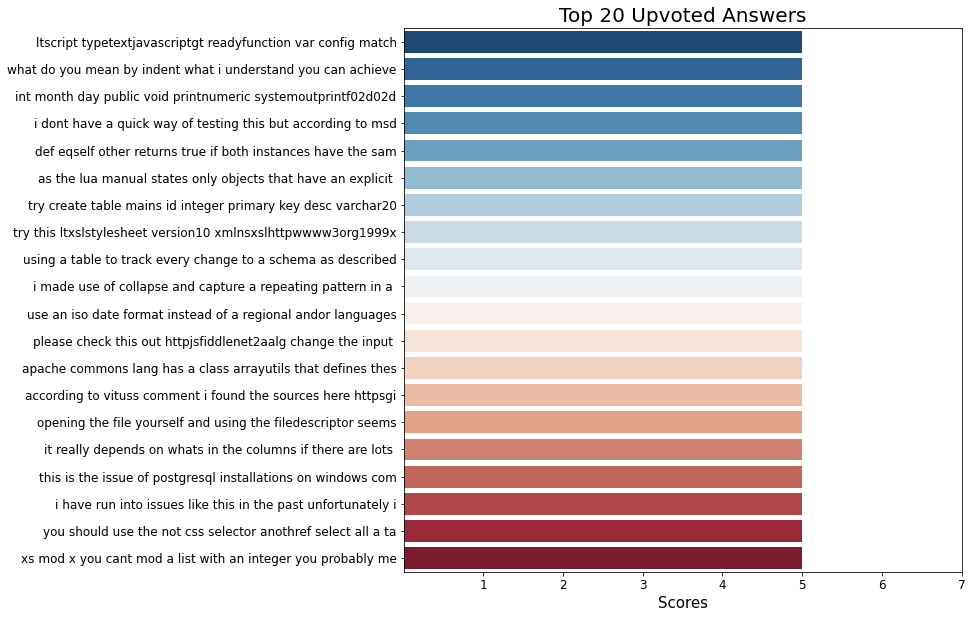

In [81]:
from textwrap import wrap
f, ax = plt.subplots(figsize=(10, 10))

names_top20_a_upvotes = list(top_20_upvoted_answers_df.A_Body.str[:60])
values_top20_a_upvotes = list(top_20_upvoted_answers_df.A_Score)
print(names_top20_a_upvotes, values_top20_a_upvotes)
#names_top20_a_upvotes = [ '\n'.join(wrap(l, 20)) for l in names_top20_a_upvotes ]

ax = sns.barplot(x=values_top20_a_upvotes, y=names_top20_a_upvotes, palette="RdBu_r", ax=ax)
ax.set_title("Top 20 Upvoted Answers",fontsize=20)
ax.set_xticks([1,2,3,4,5,6,7])
ax.set_xlabel('Scores', fontsize=15)
ax.tick_params(labelsize=12)
#plt.tight_layout()

- Word cloud for 'Tags'
- Word cloud for 'Questions (Title AND Body)'
- Word cloud for 'Answers'

In [83]:
!pip install wordcloud

In [84]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

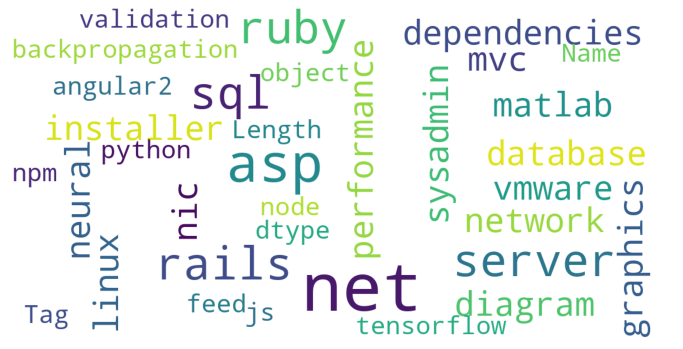

In [79]:
show_wordcloud(df_no_outliers_unique_q['Tag'])

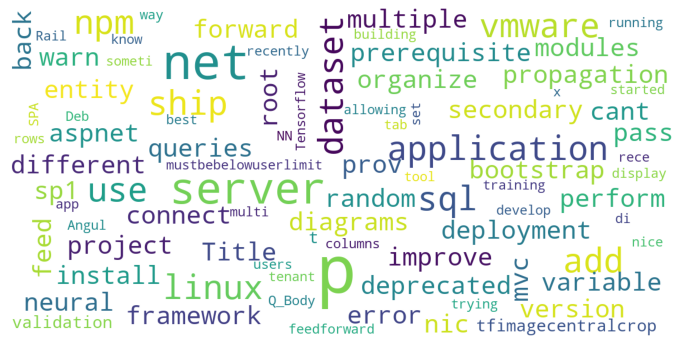

In [86]:
show_wordcloud(df_no_outliers_unique_q[['Title','Q_Body']])

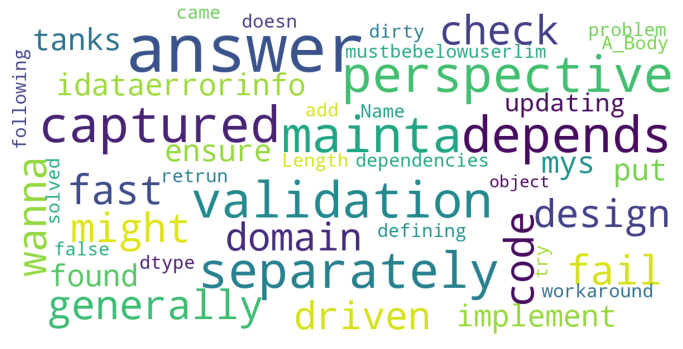

In [87]:
show_wordcloud(df_no_outliers['A_Body'])

In [88]:
df_downvotes = df_no_outliers_unique_q[df_no_outliers_unique_q['Q_Score'] < 0]
df_upvotes = df_no_outliers_unique_q[df_no_outliers_unique_q['Q_Score'] > 0]

In [89]:
df_downvotes['Title'].sample(5)

1994678    unable delete 90 days older data mysql via she...
1740669    android studio doesnt display interface correctli
1522829    check installation folder rpm exists target ma...
1895399      instance variable invoke method override upcast
1364734    need store three users login data session vari...
Name: Title, dtype: object

In [90]:
df_upvotes['Title'].sample(5)

1989210    something div created without knowing event cr...
907005                      show next available invoice numb
1754243    multiple python installations pip dude sitepackag
1175605    bcp write simple query results disk faster ssm...
1844508              know field masked due field level secur
Name: Title, dtype: object

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



                       Frequency
Word                            
can not find                 202
google app engine            186
sql server 2008              176
visual studio 2010           173
mac os x                     147
windows phone 8              128
can not read                 121
google maps api              120
visual studio 2015           118
visual studio 2013           104
error can not                103
visual studio 2012           101
can not get                   94
not read property             93
windows phone 7               91
google app engin              83
can not access                80
windows phone 81              79
sql server 2005               78
internal server error         72


Text(0.5, 1.0, 'Upvoted questions_Trigram word frequency')

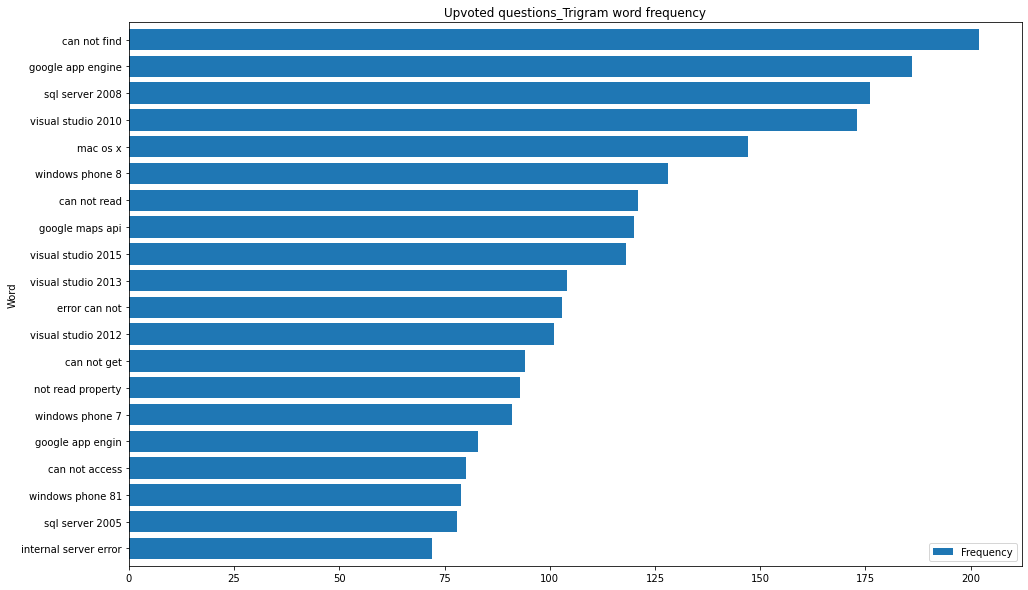

In [91]:
from collections import Counter
upvoted_questions = (df_upvotes.Title
           .str.cat(sep=' '))

words_up_questions = nltk.tokenize.word_tokenize(upvoted_questions)

trigrm_up = list(nltk.trigrams(words_up_questions))
print (trigrm_up)

word_dist_up = nltk.FreqDist([' '.join(x) for x in trigrm_up])
trigram_up_question_words = pd.DataFrame(word_dist_up.most_common(20),
                columns=['Word', 'Frequency']).set_index('Word').sort_values(by=['Frequency'], ascending=True)
print(trigram_up_question_words.sort_values(by=['Frequency'], ascending=False))

trigram_up_question_words.plot.barh(rot=0, figsize=(16,10), width=0.8)
plt.title('Upvoted questions_Trigram word frequency')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Text(0.5, 1.0, 'Downvoted questions_Trigram word frequency')

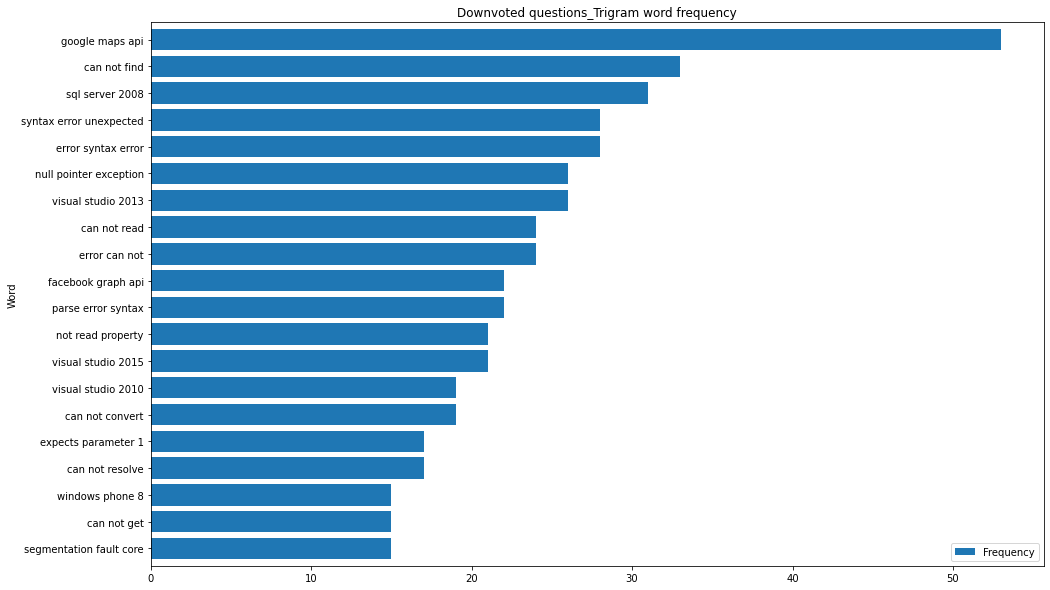

In [92]:
downvoted_questions = (df_downvotes.Title
           .str.cat(sep=' '))

words_dw_questions = nltk.tokenize.word_tokenize(downvoted_questions)

trigrm_dw = list(nltk.trigrams(words_dw_questions))
print (trigrm_dw)

word_dist_dw = nltk.FreqDist([' '.join(x) for x in trigrm_dw])
trigram_dw_question_words = pd.DataFrame(word_dist_dw.most_common(20),
                columns=['Word', 'Frequency']).set_index('Word').sort_values(by=['Frequency'], ascending=True)
print(trigram_dw_question_words.sort_values(by=['Frequency'], ascending=False))

trigram_dw_question_words.plot.barh(rot=0, figsize=(16,10), width=0.8)
plt.title('Downvoted questions_Trigram word frequency')

Trigrams of Answers that were upvoted and downvoted

In [93]:
df_ans_downvotes = df_no_outliers[df_no_outliers['A_Score'] < 0]
df_ans_upvotes = df_no_outliers[df_no_outliers['A_Score'] > 0]

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



                     Frequency
Word                          
you need to                832
you want to                688
you can use                615
if you want                509
you have to                349
if you are                 266
you can do                 265
be able to                 250
something like this        247
there is no                226
if you have                209
in this case               181
to get the                 180
you are using              177
this is a                  174
to use the                 174
in order to                164
to do this                 162
what you want              160
there is a                 158


Text(0.5, 1.0, 'Upvoted answers_Trigram word frequency')

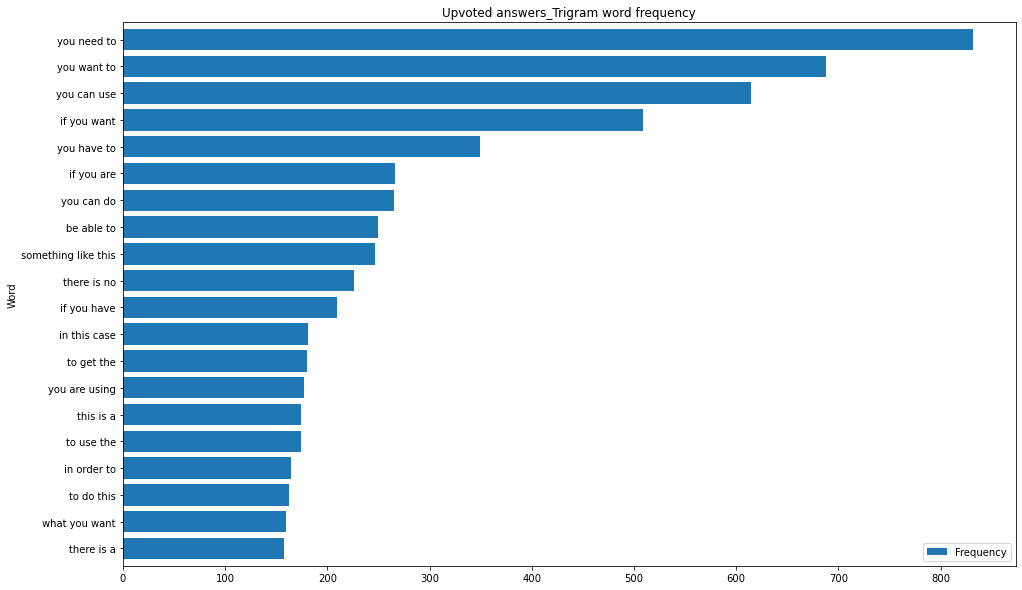

In [94]:
np.random.seed(2018)

df_ans_upvotes.reset_index(drop=True, inplace=True)
sample = np.random.choice(df_ans_upvotes.shape[0], 10000, replace = False) 
df_ans_upvotes_subset = df_ans_upvotes.loc[sample]

from collections import Counter
#from nltk import everygrams

upvoted_answers = (df_ans_upvotes_subset.A_Body
           .str.cat(sep=' '))

words_up_answers = nltk.tokenize.word_tokenize(upvoted_answers)

trigrm_ans_up = list(nltk.trigrams(words_up_answers))
print (trigrm_ans_up)

ans_word_dist_up = nltk.FreqDist([' '.join(x) for x in trigrm_ans_up])
trigram_up_answer_words = pd.DataFrame(ans_word_dist_up.most_common(20),
                columns=['Word', 'Frequency']).set_index('Word').sort_values(by=['Frequency'], ascending=True)
print(trigram_up_answer_words.sort_values(by=['Frequency'], ascending=False))

trigram_up_answer_words.plot.barh(rot=0, figsize=(16,10), width=0.8)
plt.title('Upvoted answers_Trigram word frequency')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



                     Frequency
Word                          
you can use                525
you want to                516
you need to                504
if you want                322
you have to                294
if you are                 214
you can do                 213
something like this        187
you are using              161
long text long             155
text long text             154
0 i lt                     149
i think you                141
be able to                 138
i 0 i                      138
if you have                132
there is no                129
a look at                  116
there is a                 115
what you want              114


Text(0.5, 1.0, 'Downvoted answers_Trigram word frequency')

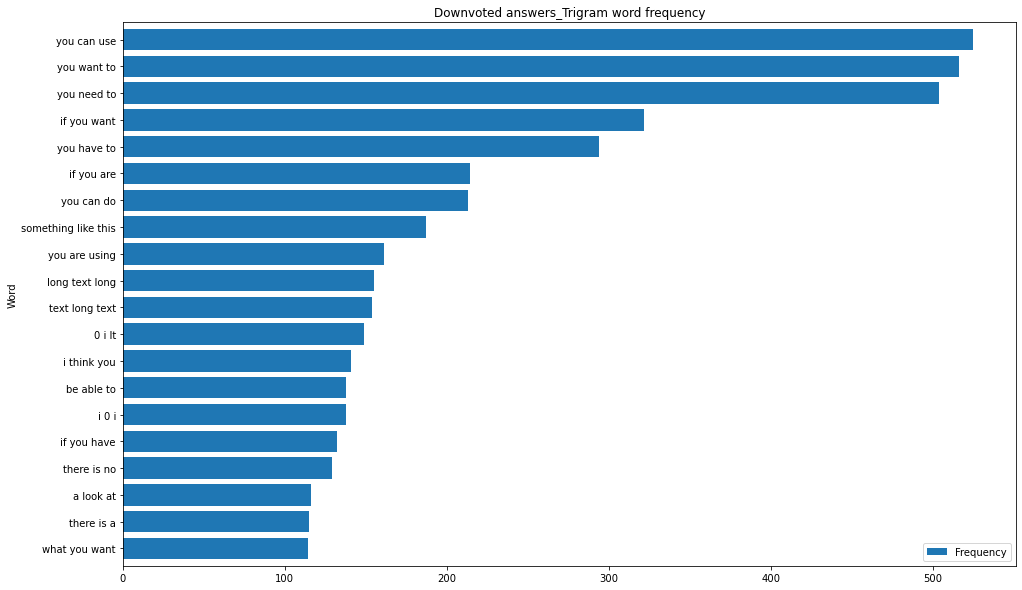

In [95]:
np.random.seed(2018)

df_ans_downvotes.reset_index(drop=True, inplace=True)
sample = np.random.choice(df_ans_downvotes.shape[0], 10000, replace = False) 
df_ans_downvotes_subset = df_ans_downvotes.loc[sample]

downvoted_answers = (df_ans_downvotes_subset.A_Body
           .str.cat(sep=' '))

words_dw_answers = nltk.tokenize.word_tokenize(downvoted_answers)

trigrm_ans_dw = list(nltk.trigrams(words_dw_answers))
print (trigrm_ans_dw)

ans_word_dist_dw = nltk.FreqDist([' '.join(x) for x in trigrm_ans_dw])
trigram_dw_answer_words = pd.DataFrame(ans_word_dist_dw.most_common(20),
                columns=['Word', 'Frequency']).set_index('Word').sort_values(by=['Frequency'], ascending=True)
print(trigram_dw_answer_words.sort_values(by=['Frequency'], ascending=False))

trigram_dw_answer_words.plot.barh(rot=0, figsize=(16,10), width=0.8)
plt.title('Downvoted answers_Trigram word frequency')

In [96]:
df_no_outliers.shape[0]

1701432

Text preprocessing before we can perform missing value handling further - Continuing from earlier step where text processing was only done on "Title". 

In [101]:
df_no_outliers['A_Body'] = df_no_outliers['A_Body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df_no_outliers['A_Body'] = df_no_outliers['A_Body'].apply(lambda x: stemmer.stem(x))

In [102]:
df_no_outliers['Q_Body'] = df_no_outliers['Q_Body'].str.lower()
df_no_outliers['Q_Body'] = df_no_outliers['Q_Body'].apply(remove_punctuation)
df_no_outliers['Q_Body'] = df_no_outliers['Q_Body'].apply(lambda x: re.sub('<[^<]+?>','',x))
df_no_outliers['Q_Body'] = df_no_outliers['Q_Body'].apply(lambda x: clean_text(x))

In [104]:
print(df_no_outliers.columns, df_no_outliers.Id.nunique())

Index(['Q_Score', 'A_Score', 'Id', 'CreationYear', 'Title', 'Q_Body', 'Tag',
       'A_Body'],
      dtype='object') 1013820


In [105]:
#df_no_outliers.drop(columns=['CreationYear'],inplace=True)
columnsTitles = ['Id', 'Title', 'Tag', 'Q_Body', 'Q_Score', 'A_Body', 'A_Score']
df_cleaned = df_no_outliers.reindex(columns=columnsTitles)

In [106]:
df_cleaned.columns

Index(['Id', 'Title', 'Tag', 'Q_Body', 'Q_Score', 'A_Body', 'A_Score'], dtype='object')

In [108]:
Q_25per = df_cleaned['Q_Body'].str.len().quantile(0.25)
Q_75per = df_cleaned['Q_Body'].str.len().quantile(0.75)
Q_IQR = Q_75per - Q_25per

A_25per = df_cleaned['A_Body'].str.len().quantile(0.25)
A_75per = df_cleaned['A_Body'].str.len().quantile(0.75)
A_IQR = A_75per - A_25per

print(df_cleaned['Q_Body'].str.len().mean(), df_cleaned['Q_Body'].str.len().median(), Q_IQR)
print(df_cleaned['A_Body'].str.len().mean(), df_cleaned['A_Body'].str.len().median(), A_IQR)

1029.546890501648 707.0 766.0
391.6726316420521 258.0 328.0


Filter out question body and answer body that have length < 100 characters, considering we would be interested in the Q&A which are more technical in nature describing problem, what was done/ can be done to solve the problem

In [111]:
df_cleaned = df_no_outliers[df_no_outliers['Q_Body'].str.len() >= 100]
df_cleaned = df_no_outliers[df_no_outliers['A_Body'].str.len() >= 100]

In [112]:
df_cleaned.shape[0]

1455256

In [113]:
df_cleaned.head()

,Q_Score,A_Score,Id,CreationYear,Title,Q_Body,Tag,A_Body
0,7,1,2750,2008,data verifications gettersetter elsewher,pim wondering if its a good idea to make stron...,"optimization, setter, getter, verification",validation captured separately getters setters...
1,7,3,2750,2008,data verifications gettersetter elsewher,pim wondering if its a good idea to make stron...,"optimization, setter, getter, verification",perspective maintainable code think much valid...
2,7,3,2750,2008,data verifications gettersetter elsewher,pim wondering if its a good idea to make stron...,"optimization, setter, getter, verification",depends generally code fail fast value set mul...
3,7,1,2750,2008,data verifications gettersetter elsewher,pim wondering if its a good idea to make stron...,"optimization, setter, getter, verification",might wanna check domain driven design eric ev...
4,7,1,2750,2008,data verifications gettersetter elsewher,pim wondering if its a good idea to make stron...,"optimization, setter, getter, verification",like implement idataerrorinfo put validation l...


In [115]:
df_cleaned.to_csv('.\data\Stackoverflow_cleaned.csv')